In [6]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [7]:
#Loading the data
data = pd.read_csv("E:/Data Science/Spam Classification/1.2+sms_spam.csv")

In [9]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking...
1,ham,K..going bacckk to stävänger
2,ham,Am also dong in cbe ony. Bt have to pay
3,ham,Are you this much buzy
4,ham,Please ask mummy to call father


In [10]:
data.shape

(5060, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5060 non-null   object
 1   text    5060 non-null   object
dtypes: object(2)
memory usage: 79.2+ KB


In [12]:
#Checking the missing values
data.isnull().sum()

type    0
text    0
dtype: int64

In [13]:
#checking the duplicate values
data.duplicated().sum()

383

There are 383 duplicate rows. So we have to remove these rows.

In [14]:
#droping the duplivcate values
data = data.drop_duplicates()

In [15]:
#reset the index
data.reset_index(inplace=True,drop=True)

In [16]:
data

,type,text
0,ham,Hope you are having a good week. Just checking...
1,ham,K..going bacckk to stävänger
2,ham,Am also dong in cbe ony. Bt have to pay
3,ham,Are you this much buzy
4,ham,Please ask mummy to call father
...,...,...
4672,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
4673,spam,For ur chance to win a £250 cash every wk TXT:...
4674,spam,Ur balance is now £500. Ur next question is: W...
4675,spam,"If you don't, your prize will go to another cu..."


ham     0.860381
spam    0.139619
Name: type, dtype: float64


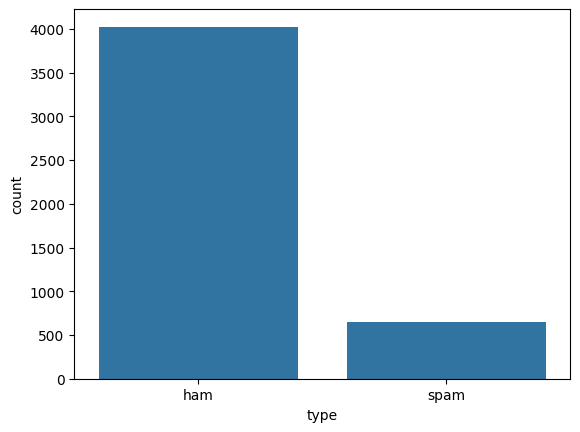

In [17]:
#Seeing the distribution of target variable
print(data['type'].value_counts(normalize=True))
sns.countplot(x=data['type'])
plt.show()

The majority of the messages are of type ham. And very few are type spam.

In [18]:
data['text'][0]

'Hope you are having a good week. Just checking in ñó ñó'

In [19]:
data['text'][20]

"Well if I'm that desperate I'll just call armand again"

## Text Preprocessing

In [20]:
#Coping the data into new dataframe
df = data.copy()

#### Removing accented characters

In [21]:
import unidecode
text = []

for i in range(len(df)):
    words = df['text'][i].split()
    new_text = [unidecode.unidecode(word) for word in words]
    new_text = ' '.join(new_text)
    text.append(new_text)
df['cleaned_text'] = text

In [22]:
df['cleaned_text'][0]

'Hope you are having a good week. Just checking in no no'

In [23]:
df.head()

,type,text,cleaned_text
0,ham,Hope you are having a good week. Just checking...,Hope you are having a good week. Just checking...
1,ham,K..going bacckk to stävänger,K..going bacckk to stavanger
2,ham,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe ony. Bt have to pay
3,ham,Are you this much buzy,Are you this much buzy
4,ham,Please ask mummy to call father,Please ask mummy to call father


### Removing special characters

In [24]:
import re
p = '[^a-zA-Z0-9]+'
text = []
for i in range(len(df)):
    words = df['cleaned_text'][i]
    new_text = [re.sub(p,' ',w) for w in words]
    new_text = ''.join(new_text)
    text.append(new_text)
df['cleaned_text'] = text

In [25]:
df

,type,text,cleaned_text
0,ham,Hope you are having a good week. Just checking...,Hope you are having a good week Just checking...
1,ham,K..going bacckk to stävänger,K going bacckk to stavanger
2,ham,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe ony Bt have to pay
3,ham,Are you this much buzy,Are you this much buzy
4,ham,Please ask mummy to call father,Please ask mummy to call father
...,...,...,...
4672,spam,"Get 3 Lions England tone, reply lionm 4 mono o...",Get 3 Lions England tone reply lionm 4 mono o...
4673,spam,For ur chance to win a £250 cash every wk TXT:...,For ur chance to win a PS250 cash every wk TXT...
4674,spam,Ur balance is now £500. Ur next question is: W...,Ur balance is now PS500 Ur next question is ...
4675,spam,"If you don't, your prize will go to another cu...",If you don t your prize will go to another cu...


In [26]:
#Another way of removing special character
text = []
for i in range(len(df)):
    words = df['cleaned_text'][i].split()
    new_text = [word for word in words if word.isalnum()]
    new_text = ' '.join(new_text)
    text.append(new_text)
df['cleaned_text'] = text

In [24]:
#Another way of removing special character
import string
for i in range(len(df['text'])):
    for j in df['text'][i]:
        if j in string.punctuation:
            df['text'][i] = df['text'][i].replace(j, ' ')

### Lowercasing all the letters

In [27]:
text = []
for i in range(len(df)):
    new_text = df['cleaned_text'][i].lower()
    text.append(new_text)
df['cleaned_text']=text

In [28]:
df.head()

,type,text,cleaned_text
0,ham,Hope you are having a good week. Just checking...,hope you are having a good week just checking ...
1,ham,K..going bacckk to stävänger,k going bacckk to stavanger
2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe ony bt have to pay
3,ham,Are you this much buzy,are you this much buzy
4,ham,Please ask mummy to call father,please ask mummy to call father


### Stripping the extra spaces

In [29]:
text = []
for i in range(len(df)):
    new_text = df['cleaned_text'][i].strip()
    text.append(new_text)
df['cleaned_text'] = text

In [30]:
df.head()

,type,text,cleaned_text
0,ham,Hope you are having a good week. Just checking...,hope you are having a good week just checking ...
1,ham,K..going bacckk to stävänger,k going bacckk to stavanger
2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe ony bt have to pay
3,ham,Are you this much buzy,are you this much buzy
4,ham,Please ask mummy to call father,please ask mummy to call father


### Correcting the spelling of the words

In [31]:
import autocorrect

In [32]:
spell = autocorrect.Speller(lang='en')

In [33]:
text = []
for i in range(len(df)):
    words = df['cleaned_text'][i].split()
    new_text = [spell(word) for word in words]
    new_text = ' '.join(new_text)
    text.append(new_text)
df['cleaned_text'] = text

In [34]:
df.head()

,type,text,cleaned_text
0,ham,Hope you are having a good week. Just checking...,hope you are having a good week just checking ...
1,ham,K..going bacckk to stävänger,k going back to stranger
2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe on bt have to pay
3,ham,Are you this much buzy,are you this much buy
4,ham,Please ask mummy to call father,please ask mummy to call father


In [38]:
#Wordcloud for both text and cleaned text column
import wordcloud
all_text = " ".join(i for i in df['text'])
all_cleaned_text = ' '.join(i for i in df['cleaned_text'])
wrdcld_text = wordcloud.WordCloud(max_words=100,max_font_size=40,background_color='white').generate(all_text)
wrdcld_cleaned_text = wordcloud.WordCloud(max_words=100,max_font_size=40,background_color='white').generate(all_cleaned_text)

(-0.5, 399.5, 199.5, -0.5)

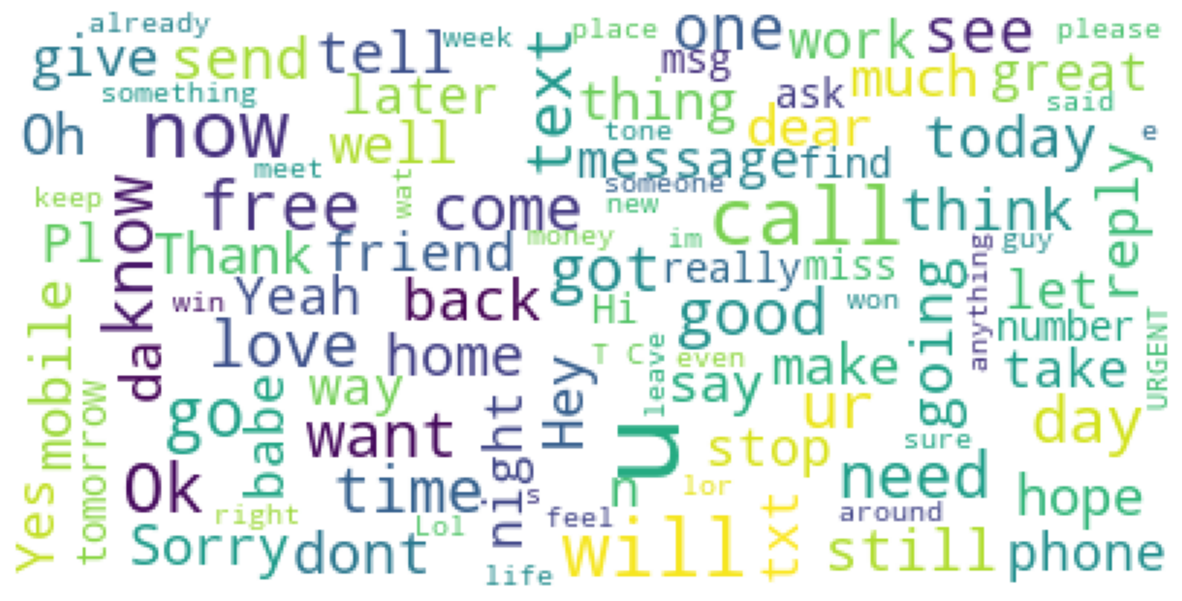

In [39]:
#Wordcloud for uncleaned text
plt.figure(figsize=(15,8))
plt.imshow(wrdcld_text)
plt.axis('off')

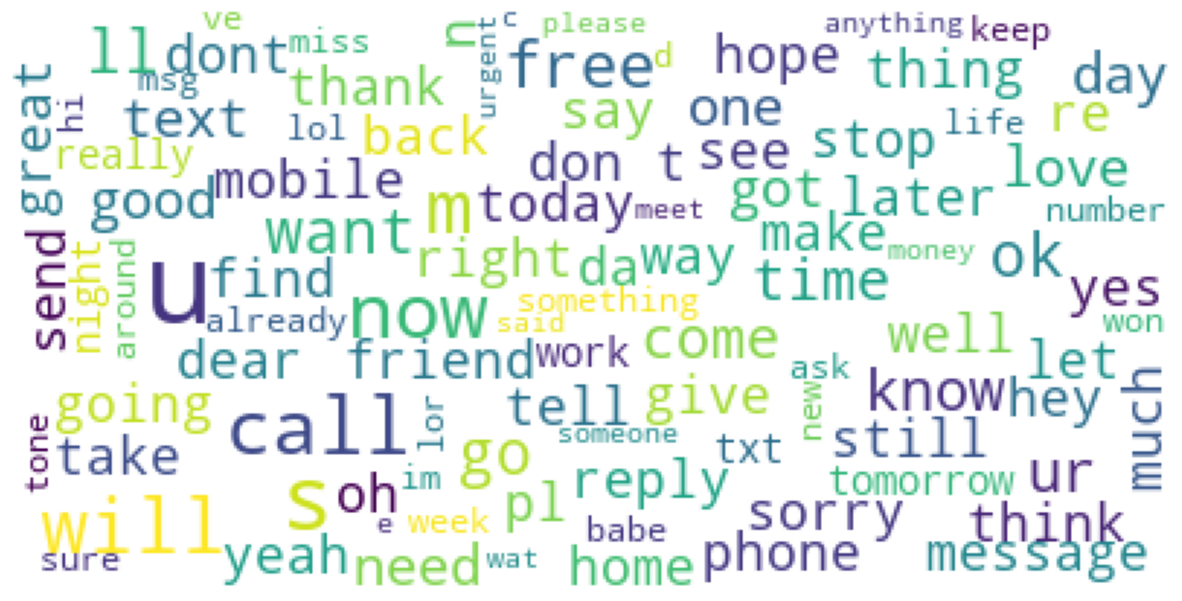

In [40]:
#Wordcloud for cleaned text
plt.figure(figsize=(15,8))
plt.imshow(wrdcld_cleaned_text)
plt.axis('off')
plt.show()

### Removing the stopwords using NLTK

In [43]:
from stop_words import get_stop_words

In [44]:
st_wrd = get_stop_words('en')

In [45]:
text = []

for i in range(len(df)):
    wrds = df['cleaned_text'][i].split()
    new_text = [wrd for wrd in wrds if wrd not in st_wrd]
    new_text = ' '.join(new_text)
    text.append(new_text)
    
df['cleaned_nostpwrd_text'] = text

In [46]:
df.head()

,type,text,cleaned_text,cleaned_nostpwrd_text
0,ham,Hope you are having a good week. Just checking...,hope you are having a good week just checking ...,hope good week just checking
1,ham,K..going bacckk to stävänger,k going back to stranger,k going back stranger
2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe on bt have to pay,also dong cbe bt pay
3,ham,Are you this much buzy,are you this much buy,much buy
4,ham,Please ask mummy to call father,please ask mummy to call father,please ask mummy call father


In [47]:
#Plotting wordcloud
all_texts = ' '.join(s for s in df['cleaned_nostpwrd_text'])
wrdcld_cleaned_text_nostp_wrd = wordcloud.WordCloud(max_words=100,max_font_size=40,background_color='white').generate(all_texts)

(-0.5, 399.5, 199.5, -0.5)

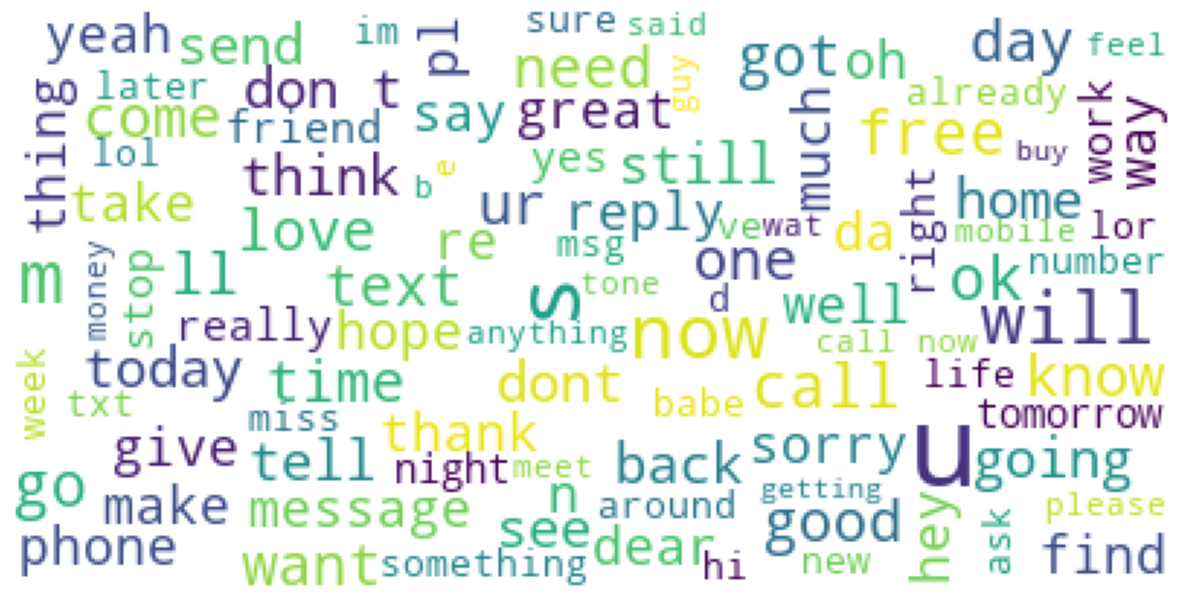

In [48]:
plt.figure(figsize=(15,8))
plt.imshow(wrdcld_cleaned_text_nostp_wrd)
plt.axis('off')

### Lammetization using NLTK

In [55]:
from nltk.stem import SnowballStemmer

In [57]:
lem = SnowballStemmer('english')

In [59]:
text = []
for i in range(len(df)):
    wrds = df['cleaned_nostpwrd_text'][i].split()
    new_text = [lem.stem(w) for w in wrds]
    new_text = ' '.join(new_text)
    text.append(new_text)
df['lemmatized_text'] = text

In [60]:
df

,type,text,cleaned_text,cleaned_nostpwrd_text,lemmatized_text
0,ham,Hope you are having a good week. Just checking...,hope you are having a good week just checking ...,hope good week just checking,hope good week just check
1,ham,K..going bacckk to stävänger,k going back to stranger,k going back stranger,k go back stranger
2,ham,Am also dong in cbe ony. Bt have to pay,am also dong in cbe on bt have to pay,also dong cbe bt pay,also dong cbe bt pay
3,ham,Are you this much buzy,are you this much buy,much buy,much buy
4,ham,Please ask mummy to call father,please ask mummy to call father,please ask mummy call father,pleas ask mummi call father
...,...,...,...,...,...
4672,spam,"Get 3 Lions England tone, reply lionm 4 mono o...",get 3 lions england tone reply lion 4 mono or ...,get 3 lions england tone reply lion 4 mono lio...,get 3 lion england tone repli lion 4 mono lion...
4673,spam,For ur chance to win a £250 cash every wk TXT:...,for ur chance to win a ps250 cash every wk txt...,ur chance win ps250 cash every wk txt action 8...,ur chanc win ps250 cash everi wk txt action 80...
4674,spam,Ur balance is now £500. Ur next question is: W...,ur balance is now ps500 ur next question is wh...,ur balance now ps500 ur next question sang upt...,ur balanc now ps500 ur next question sang upto...
4675,spam,"If you don't, your prize will go to another cu...",if you don t your prize will go to another cus...,don t prize will go another customer t c www t...,don t prize will go anoth custom t c www t c b...


### Vectorizaion using BOW

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [116]:
cv = CountVectorizer()

In [117]:
bow_vector = cv.fit_transform(df['lemmatized_text'])

In [118]:
bow_vector = bow_vector.toarray()

In [119]:
#defining y
y = df['type']

In [120]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(bow_vector, y, train_size=0.8, random_state= 1)

### Model Building 

In [121]:
from sklearn.naive_bayes import MultinomialNB

In [122]:
mod = MultinomialNB()

In [123]:
mod.fit(x_train, y_train)

MultinomialNB()

In [124]:
#Training accuracy
mod.score(x_train,y_train)

0.9930499866345897

In [125]:
#Testing accuracy
mod.score(x_test, y_test)

0.9861111111111112

In [126]:
y_test_pred = mod.predict(x_test)

<Axes: >

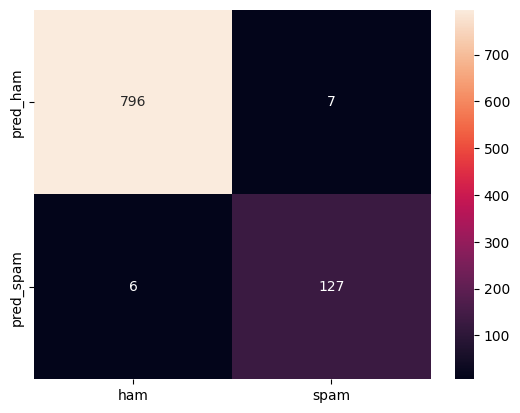

In [127]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['ham','spam'],index=['pred_ham','pred_spam'])
sns.heatmap(cm,annot=True,fmt='0.4g')

In [128]:
#Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(mod.predict(x_test), y_test))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       802
        spam       0.95      0.95      0.95       134

    accuracy                           0.99       936
   macro avg       0.97      0.97      0.97       936
weighted avg       0.99      0.99      0.99       936



We can see that we acheive very good accuracy of 99% also model is not overfitting.

### Vectorization using TFIDF

In [129]:
tf = TfidfVectorizer()
tf_vector = tf.fit_transform(df['lemmatized_text'])

In [130]:
#Defining x
x = tf_vector.toarray()
y = df['type']

In [131]:
#Spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2)

In [132]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [133]:
#training accuracy
model.score(x_train,y_train)

0.9716653301256348

In [134]:
#Testing accuracy
model.score(x_test, y_test)

0.9626068376068376

In [135]:
#Prediction for x_test
y_test_pred = model.predict(x_test)

<Axes: >

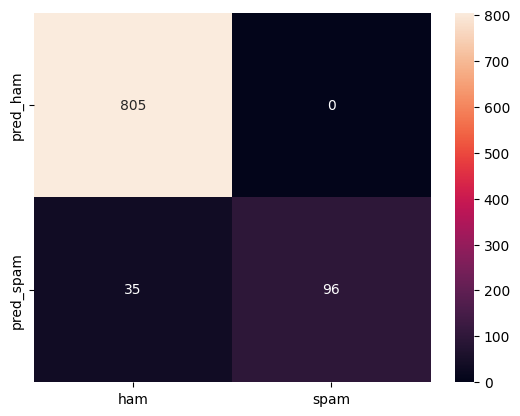

In [136]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['ham','spam'],index=['pred_ham','pred_spam'])
sns.heatmap(cm,annot=True,fmt='0.4g')

In [137]:
#PRininting the classification report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       840
        spam       0.73      1.00      0.85        96

    accuracy                           0.96       936
   macro avg       0.87      0.98      0.91       936
weighted avg       0.97      0.96      0.97       936



* We can see that BOW performs better than TFIDF.
* We can go ahead with the BOW model which has an accuracy pf 99%.